# Question 2 : What are the best profit genres and top five genres percentages?

In this question, we aimed to find best genres according to genres

1. We clean our 'Worldwide' Column for $ and commas (,) to convert the column from strings to integers.

2. We clean our 'Budget' Column for changing $ and commas (,)  to numeric values.

3. Create a 'Profit' column.

4. Find the films which has more than $500000000 profit.

5. Calculate the frequency of genres in these best profit films and finding the percantage of top 5 genres.

6. Plotting the data.

In [1]:
import pandas as pd  

In [2]:
df = pd.read_csv('last_all_data.csv')

In [3]:
df.dropna(subset=['Worldwide'],inplace=True)    #drop null values for Worldwide Gross

In [4]:
df.dropna(subset=['Budget'],inplace=True)      #drop null values for Budget

In [5]:
df['Worldwide']=df['Worldwide'].str.replace('$','') #replace the $ sign

In [6]:
df['Worldwide']=df['Worldwide'].str.replace(',','') #replace the (,)

In [7]:
df['Worldwide']=df['Worldwide'].astype(int)  #change the type to integer for substraction

In [190]:
df['Budget'] #see budget

In [8]:
df['Budget']=df['Budget'].str.replace('$','') #replace the $ sign

In [9]:
df['Budget']=df['Budget'].str.replace(',','') #replace the (,)

In [10]:
df['Budget']=df['Budget'].astype(int) #change the type to integer for substraction

In [11]:
df['Profit'] = df['Worldwide'] - df['Budget'] #find the profit

In [191]:
df.sort_values(by='Profit',ascending=False).head(20) #see the best profit films

In [12]:
best_profit_df = df[df['Profit'] >= 500000000] #Take the films which has more than 500000000$ profit

##  To see frequencies of genres in films which has more than 500000000$ profit

In [162]:
best_profit_df['genre_ids'].str.count('Drama').sum() 

20.0

In [163]:
best_profit_df['genre_ids'].str.count('Action').sum()

65.0

In [164]:
best_profit_df['genre_ids'].str.count('Romance').sum()

9.0

In [167]:
best_profit_df['genre_ids'].str.count('Animation').sum()

30.0

In [168]:
best_profit_df['genre_ids'].str.count('Family').sum()

35.0

In [169]:
best_profit_df['genre_ids'].str.count('Fantasy').sum()

43.0

In [170]:
best_profit_df['genre_ids'].str.count('Science Fiction').sum()

37.0

In [171]:
best_profit_df['genre_ids'].str.count('Thriller').sum()

16.0

In [172]:
best_profit_df['genre_ids'].str.count('Mystery').sum()

3.0

In [173]:
best_profit_df['genre_ids'].str.count('Horror').sum()

1.0

In [174]:
best_profit_df['genre_ids'].str.count('Crime').sum()

7.0

In [175]:
best_profit_df['genre_ids'].str.count('Comedy').sum()

29.0

In [176]:
best_profit_df['genre_ids'].str.count('Adventure').sum()

89.0

In [177]:
best_profit_df['genre_ids'].str.count('Action').sum()

65.0

In [178]:
best_profit_df['genre_ids'].str.count('Western').sum()

0.0

In [179]:
best_profit_df['genre_ids'].str.count('Music').sum()

1.0

In [180]:
best_profit_df['genre_ids'].str.count('War').sum()

0.0

In [181]:
best_profit_df['genre_ids'].str.count('TV Movie').sum()

0.0

In [182]:
best_profit_df['genre_ids'].str.count('Documentary').sum()

0.0

In [13]:
data = [['Drama', 20], ['Comedy',29],['Crime',7],['Thriller',16], ['Romance', 9],['Action', 65],['Adventure',89],
        ['Animation',30],['Mystery' ,3],['War',0],['Fantasy',43],['Science Fiction',37],['Music',1],['Horror',1],
        ['Western',0],['TV Movie',0], ['Documentary',0]] 
  
# Create the pandas DataFrame 
df_genres = pd.DataFrame(data, columns = ['Name_of_Genres', 'Frequency']) 
  
# See the % of them in 118 films
df_genres['% of Genres'] = (df_genres['Frequency']*100)/118 

In [14]:
sorted_genres = df_genres.sort_values(by='% of Genres',ascending=False)

In [193]:
sorted_genres

,Name_of_Genres,Frequency,% of Genres
6,Adventure,89,75.423729
5,Action,65,55.084746
10,Fantasy,43,36.440678
11,Science Fiction,37,31.355932
7,Animation,30,25.423729
1,Comedy,29,24.576271
0,Drama,20,16.949153
3,Thriller,16,13.559322
4,Romance,9,7.627119
2,Crime,7,5.932203


# Plot the Number of Genres in Profit>500000000$

In [15]:
import numpy as np         #import necessary items for plot

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

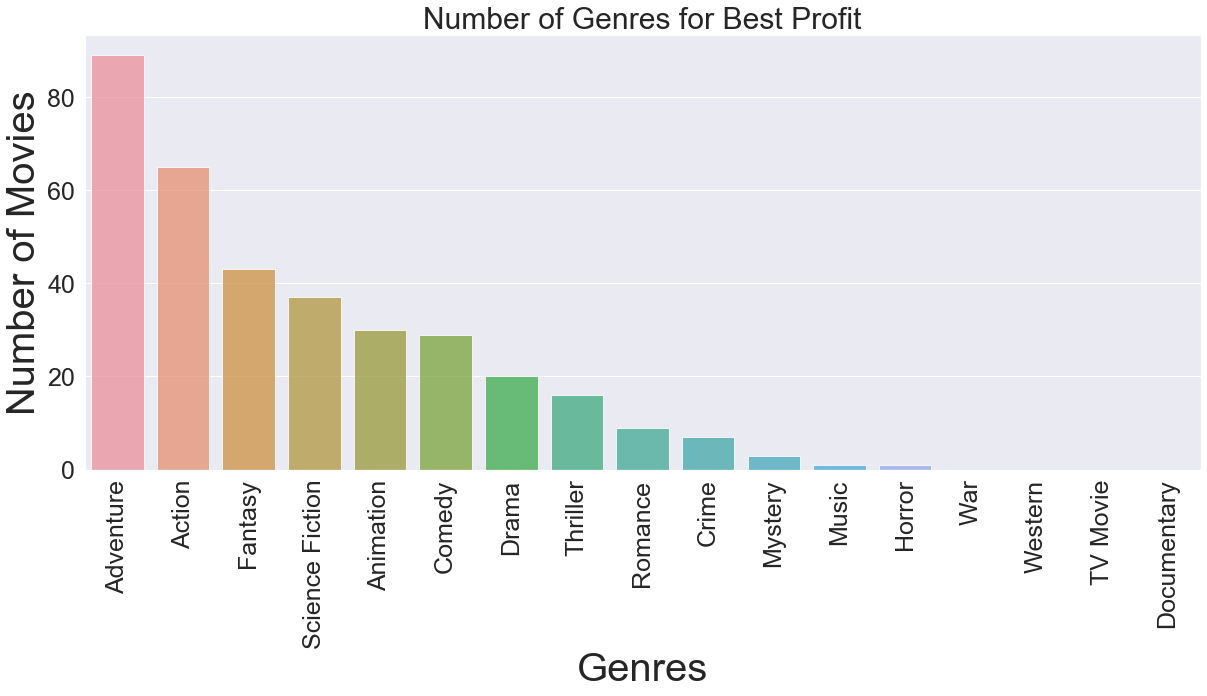

In [19]:
plt.figure(figsize=(20,8))  #plot figure size set
sns.barplot(sorted_genres['Name_of_Genres'],sorted_genres['Frequency'], alpha=0.8) #plot with seaborn
plt.title('Number of Genres for Best Profit',fontsize=30)   #put title
plt.ylabel('Number of Movies', fontsize=40)  #put labels and arrange font sizes
plt.xlabel('Genres', fontsize=40)
plt.xticks(fontsize=25)   #arranging the sizes of label fonts anf turn  values 90 degreee
plt.xticks(rotation=90)
plt.yticks(fontsize=25)
plt.show()

Graph showing the genres frequency in films which has higher than $500 millions and Adventure genre is a good choice to invest.

# Sharing Pieces of the Top 5 Genres in Best Profit Movies

In [18]:
top_5 = df_genres.sort_values(by='% of Genres',ascending=False).head(5) #take top 5 genres 

In [194]:
top_5

,Name_of_Genres,Frequency,% of Genres
6,Adventure,89,75.423729
5,Action,65,55.084746
10,Fantasy,43,36.440678
11,Science Fiction,37,31.355932
7,Animation,30,25.423729


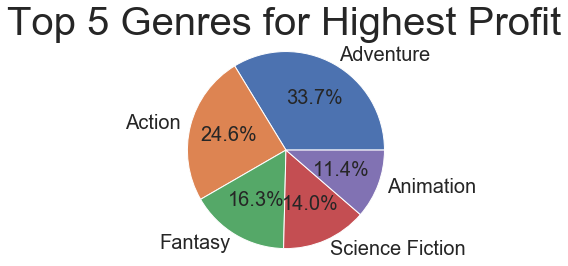

In [113]:
my_data = top_5['% of Genres']
my_labels = top_5['Name_of_Genres']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 20})
plt.title('Top 5 Genres for Highest Profit',fontsize=40)
plt.axis('equal')
mpl.rcParams.update({'font.size': 20})
#with pie plot we can see the sharing parts of each top 5 genres
plt.show() 

Pie Chart showing percentages of top 5 genres making above $500 million profits.